In [2]:
# Step 1: Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [3]:
# Step 3: Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# Step 4: Load datasets
# Replace 'path_to_training_dataset' and 'path_to_validation_dataset' with actual file paths
training_data = pd.read_csv('twitter_training.csv', header=None)
validation_data = pd.read_csv('twitter_validation.csv', header=None)

In [14]:
# Step 5: Assign appropriate column names
training_data.columns = ['id', 'topic', 'sentiment', 'tweet_text']
validation_data.columns = ['id', 'topic', 'sentiment', 'tweet_text']

# Check for missing values and data types
print("Training Data Columns:", training_data.columns)
print("Validation Data Columns:", validation_data.columns)

Training Data Columns: Index(['id', 'topic', 'sentiment', 'tweet_text'], dtype='object')
Validation Data Columns: Index(['id', 'topic', 'sentiment', 'tweet_text'], dtype='object')


In [15]:
#Check for missing values
print("Missing values in training data:", training_data['tweet_text'].isnull().sum())
print("Missing values in validation data:", validation_data['tweet_text'].isnull().sum())

# Fill missing values with empty strings if necessary
training_data['tweet_text'].fillna('', inplace=True)
validation_data['tweet_text'].fillna('', inplace=True)

Missing values in training data: 686
Missing values in validation data: 0


In [16]:
# Check data types
print("Training Data Column Data Types:")
print(training_data.dtypes)

print("Validation Data Column Data Types:")
print(validation_data.dtypes)

Training Data Column Data Types:
id             int64
topic         object
sentiment     object
tweet_text    object
dtype: object
Validation Data Column Data Types:
id             int64
topic         object
sentiment     object
tweet_text    object
dtype: object


In [17]:
#Ensure 'tweet_text' is a string
training_data['tweet_text'] = training_data['tweet_text'].astype(str)
validation_data['tweet_text'] = validation_data['tweet_text'].astype(str)

In [18]:
# Step 6: Define text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)


In [19]:
# Apply cleaning function to datasets
training_data['cleaned_text'] = training_data['tweet_text'].apply(clean_text)
validation_data['cleaned_text'] = validation_data['tweet_text'].apply(clean_text)

# Step 7: Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(training_data['cleaned_text']).toarray()
X_validation = vectorizer.transform(validation_data['cleaned_text']).toarray()
y_train = training_data['sentiment']
y_validation = validation_data['sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7337912750060256
Validation Accuracy: 0.8
Validation Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.75      0.77       172
    Negative       0.77      0.86      0.81       266
     Neutral       0.85      0.72      0.78       285
    Positive       0.79      0.86      0.82       277

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



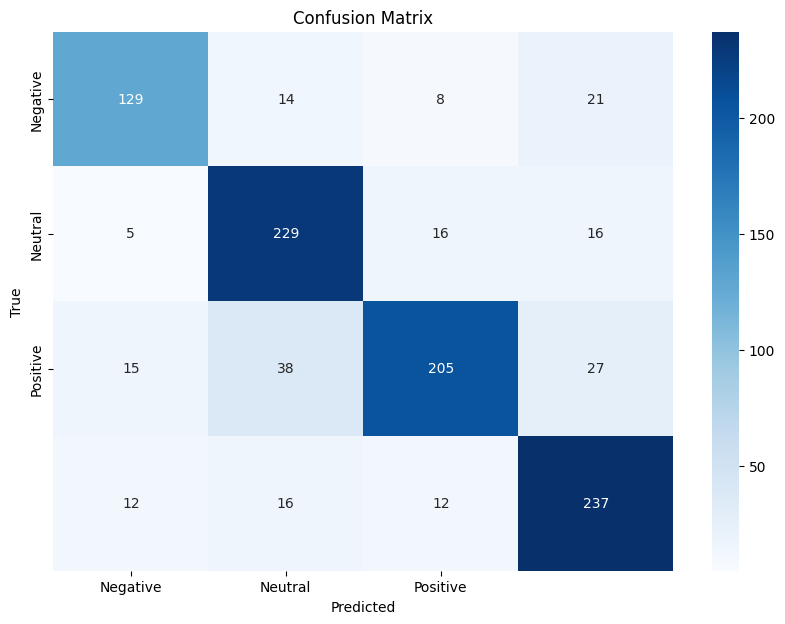

In [20]:
#Step 8: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Validation Accuracy:", accuracy_score(y_validation, y_pred_validation))
print("Validation Classification Report:\n", classification_report(y_validation, y_pred_validation))

# Step 10: Confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred_validation)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-31-6cca8561caf4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=training_data, palette='viridis')


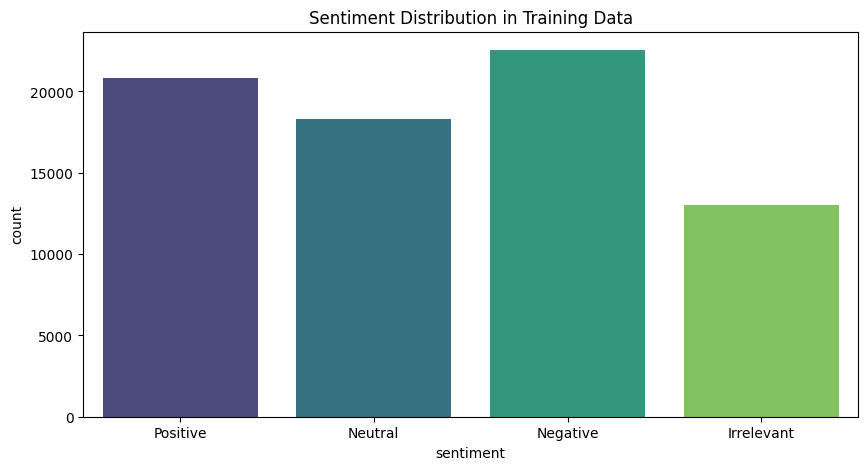

<ipython-input-31-6cca8561caf4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=validation_data, palette='viridis')


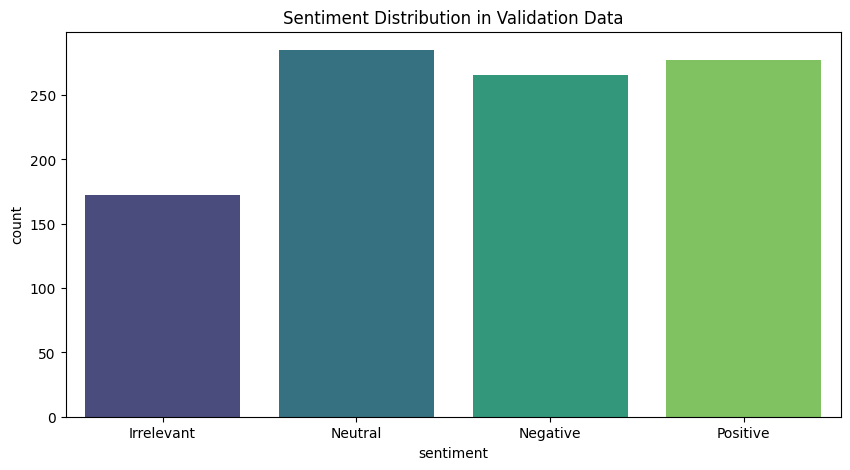

In [31]:
#Step 11: Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=training_data, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=validation_data, palette='viridis')
plt.title('Sentiment Distribution in Validation Data')
plt.show()

In [32]:
# Function to predict sentiment of new text
def predict_sentiment(text):
  cleaned_text = clean_text(text)
  text_vector = vectorizer.transform([cleaned_text]).toarray()
  prediction = model.predict(text_vector)[0]
  return prediction

# Example usage
new_text = "This product is amazing!"
predicted_sentiment = predict_sentiment(new_text)
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: Positive


In [35]:
new_text = "Die you son of something"
predicted_sentiment = predict_sentiment(new_text)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: Irrelevant


In [36]:
new_text = "Nvdia is a Giant Company"
predicted_sentiment = predict_sentiment(new_text)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: Negative
